<a href="https://colab.research.google.com/github/ajit04022000/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Data Exploration

#### <b> Finding accommodation can be one of the most frustrating aspects of planning your travels. There are two ways to solve the accommodation problem: booking in advance or finding a place on the day.

<b>Booking in advance:

Booking in advance gives the traveller peace of mind that they will have somewhere to sleep once they arrive at their destination. It is also a good idea when travelling to a popular tourist destination. Moreover advance booking will help traveler's to avoid last minute price surge.


<b>This can be done in a number of ways:
* Over the internet
* Through a travel agent
* Over the telephone

However, hotel managers have to fill beds so it's not uncommon for travellers having booked a room, particularly at the lower end of the cost scale, to arrive to find that it has been resold.<b>

###Types of accommodation

<b>There are several types of accommodation are availabel for accommodation

* Hostels
* Resort
* Capsule hotels
* Bed and Breakfasts (B&Bs) and Guesthouses
* Homestay network
* Car camping, RV camping
* Camping
* Villas
* Vacation rentals
* House Sitting


Now its time to know somithing about hotel data

In [81]:
# importing all the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<b>Now import and display the dataset

In [83]:
data = pd.read_csv('/content/drive/MyDrive/ALMABATTER/Hotel Booking Analysis - Ajit Kumar Patel/Hotel Bookings.csv')


In [84]:
# to get the 1st 5 row (default vale) and all columns of our dataset
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


<b>Data Preprocessing

*First copy the dataset, so our original dataset remains unchanged*

In [85]:
## Copy the dataset
df = data.copy()

In [86]:
df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
19239,Resort Hotel,0,3,2015,December,50,10,0,0,2,...,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-12-10


In [87]:
# this helps us to know how many entry(row) and features(column) are present in our data set
df.shape

(119390, 32)

In [88]:
# using a loop to print all the columns name
# for i in df :
#   print (i)

# it have also a inbult funtion: 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [89]:
# getting the all information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [90]:
# it's allow us to know the measures of central tendency about the data present in our DataSet
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<b>1. Dealing with Missing Values

*Check if our data contains any missing values*

In [91]:
# now we are trying to find the missing value 
#null = df.isna().sum().sort_values()/len(df)
null = df.isna().sum().sort_values(ascending=False)
null

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [92]:
# anathor approach to do this upper task (to find out null value)
for i in df :
  if df[i].isna().sum()!=0:
    print(i,"is having ",df[i].isna().sum(),"null values")

children is having  4 null values
country is having  488 null values
agent is having  16340 null values
company is having  112593 null values


In [93]:
# now we dropping the unnecessar and the most nulabel column from our data set 
# hear company is drop because the null valu is maximum and 
# arrival_date_week_number is drop because this is not that much important to our dataset
df.drop(["company","arrival_date_week_number"] , inplace = True , axis = 1)

In [94]:
# Now its the time to fill the missing value as for the as theri needed
# country = .mode()
# children = .median()
# agent = .median()
df['country'].fillna(df['country'].mode()[0],inplace = True)
df['children'].fillna(df['children'].median(),inplace = True)
df['agent'].fillna(df['agent'].median(),inplace = True)

In [95]:
# checking the missing vallu is fell or not
df.isna().sum().sort_values(ascending = False)/len(df)

hotel                             0.0
is_canceled                       0.0
reservation_status                0.0
total_of_special_requests         0.0
required_car_parking_spaces       0.0
adr                               0.0
customer_type                     0.0
days_in_waiting_list              0.0
agent                             0.0
deposit_type                      0.0
booking_changes                   0.0
assigned_room_type                0.0
reserved_room_type                0.0
previous_bookings_not_canceled    0.0
previous_cancellations            0.0
is_repeated_guest                 0.0
distribution_channel              0.0
market_segment                    0.0
country                           0.0
meal                              0.0
babies                            0.0
children                          0.0
adults                            0.0
stays_in_week_nights              0.0
stays_in_weekend_nights           0.0
arrival_date_day_of_month         0.0
arrival_date

In [96]:
# casual check
# Here we can see that the arrival_date_year ,arrival_date_month , arival_date_day_of_year
# are separated and its make the data set big so we can add them to a new column arrive_date to 
df['arrival_date'] = df['arrival_date_month'].astype(str) + " " + df['arrival_date_day_of_month'].astype(str)+ " "+ df['arrival_date_year'].astype(str)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [97]:
# now we merge all the addational guest like: adults and children to know how many addational gest are present
df['addational_guests'] = df['adults'] + df['children'] +df['babies']

In [98]:
df.shape

(119390, 32)

<b>2. Converting Datatype

*Let’s check the datatype of each column in our dataset.*

In [99]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes     

We can see different data types for different columns.

There are some columns like children, company that are float type but their values are only in integers.

So we will convert them to the integer type

In [100]:
## convert datatype of these columns from float to integer
df[['children', 'agent']] = df[['children', 'agent']].astype('int64')

#<b>Exploratory Data Analysis</b>

Now let’s do the fun part, extract the information from our data set and try to visualize the information by the help of visualition library 

(1) Hear i am trying to know how many types of accommodation are present in my DataSet and  

(2)Which accommodation is most prefarabel by people

In [101]:
# to find out the types of hottel
types_of_hotel = df['hotel'].unique()
print(f'the types of hotels are : {types_of_hotel}')

the types of hotels are : ['Resort Hotel' 'City Hotel']


In [102]:
# to know how many resort hotel and city hotels are present
resort_hot=[i for i in df["hotel"] if i=="Resort Hotel"]
print(f'the total no of booked resort_hotels are : {len(resort_hot)}')

city_hot=[i for i in df["hotel"] if i!="Resort Hotel"]
print(f'the total no of booked city_hotels are : {len(city_hot)}')

total_hotels = (len(resort_hot))+(len(city_hot))
print(f'the total no of booked total hotel present : {total_hotels}')


the total no of booked resort_hotels are : 40060
the total no of booked city_hotels are : 79330
the total no of booked total hotel present : 119390


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


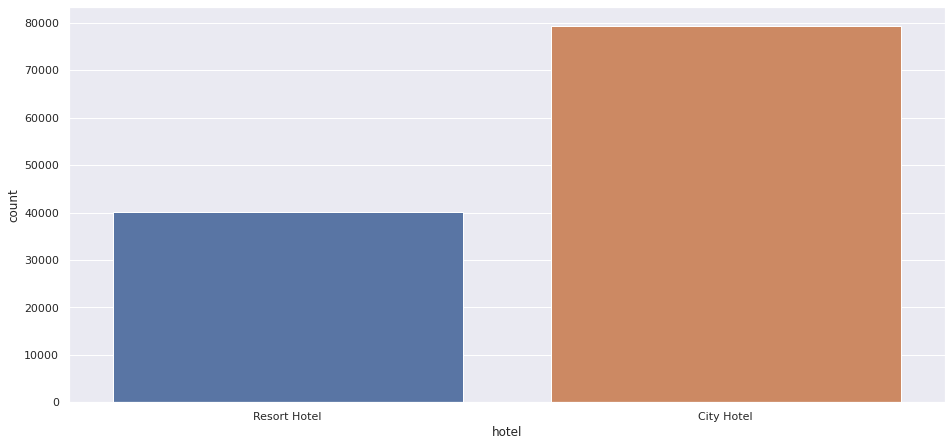

In [103]:
sns.countplot(df["hotel"])

 Hear we can see that the city hotel have more liked(reservation) by people as compair to resort hote.

### LEAD YEARS AND MONTH

###<b>3. What is the total no of booking for each year?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'years')

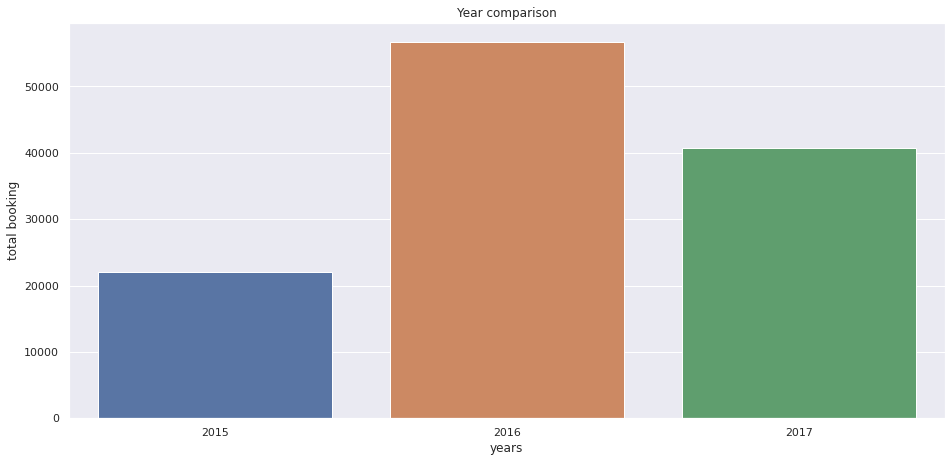

In [104]:
sns.countplot(df["arrival_date_year"])

plt.title('Year comparison')
plt.ylabel('total booking')
plt.xlabel('years')

More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.

Text(0, 0.5, 'Count')

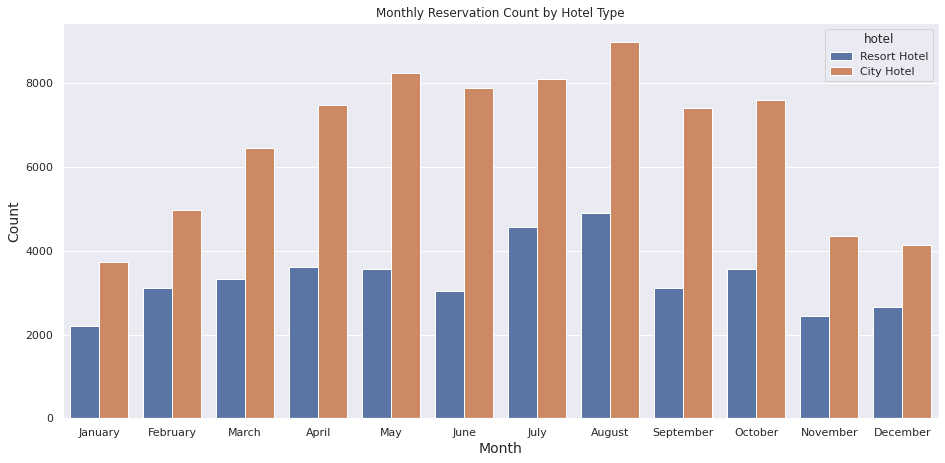

In [105]:
sns.set(rc={'figure.figsize':(15.7,7.27)})
g = sns.countplot(data=df,x="arrival_date_month",hue="hotel",order=["January","February","March","April","May","June","July","August","September","October","November","December"],)
g.set(title="Monthly Reservation Count by Hotel Type")
g.set_xlabel("Month", fontsize = 14)
g.set_ylabel("Count", fontsize = 14)

<b>city and resort hotels</b>

Highest reservation : August

lowest reservations : January

reservation getting peack:March to October

reservation getting down : november to january

###<b>4.How long people stay in hotel

###<b>5.How many no of reservation done by adult

###<b>6.What is the relation between adults and addational guest

Text(0, 0.5, 'Count')

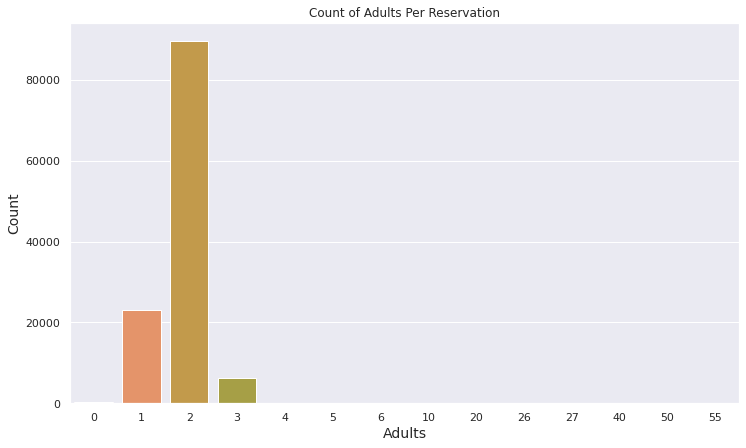

In [140]:
sns.set(rc={'figure.figsize':(12,7)})
g = sns.countplot(data=df, x="adults",)
g.set(title="Count of Adults Per Reservation")
g.set_xlabel("Adults", fontsize = 14)
g.set_ylabel("Count", fontsize = 14)

The vast majority of reservations have 2 adults followed by 1 adult.